In [2]:
from IPython.core.display import display, HTML
display(HTML('<style>.container {width:95% !important;}</style>'))


In [44]:
# load images from files
'''
Load images from their files. Each set of images should be kept in its own directory. Specify the path to this directory.
'''

import os 
from astropy.io import fits 
import numpy as np 
from sklearn.preprocessing import minmax_scale
PATH = "/home/roberttoyonaga/notebooks/roberttoyonaga/CMUDeepLensNRC/HSTLens/etg/etg_neg_unalt/"#/good_quality/"#HSTLens_detections/"


ims = np.ones((len(os.listdir(PATH)), 1, 100, 100))
filenames = os.listdir(PATH)

count =0 
for filename in filenames: 
    try:
        pic = fits.open(PATH+filename)[0].data
#         pic = fits.open(PATH+str(filename)+".fits")[0].data#filename)[0].data
    except:
        pass
    
    if pic.shape != (100, 100):
        result = np.zeros((100,100))
        result[:pic.shape[1],:pic.shape[1]] = pic
        pic = result

    if np.isnan(pic).any()==True: #if any nan
        pic = np.nan_to_num(pic) #convert nan val to 0
        sky =3.*np.median(pic)- 2.*np.mean(pic)#calc sky now that there are no nan values
        pic[pic==0] = sky #convert 0 values to sky


    ims[count] = pic
    count+=1

print ims.shape


(75, 1, 100, 100)


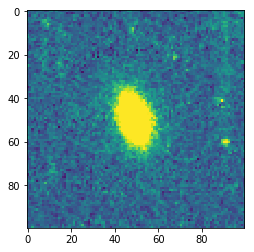

curr num 69 next=1, exit=04


In [42]:
# quickly view some images
'''
This cell allows for quick viewing of training examples that you've created. 
You can uncomment lines to plot the original images besided the finished product.
'''
from astropy.visualization import (ZScaleInterval, ImageNormalize)

import matplotlib.pyplot as plt
from IPython import display
import os
POS_PATH = "/home/roberttoyonaga/notebooks/roberttoyonaga/CMUDeepLensNRC/HSTLens/etg/etg_pos_unalt/"#/good_quality/"#HSTLens_detections/"
NEG_PATH = "/home/roberttoyonaga/notebooks/roberttoyonaga/CMUDeepLensNRC/HSTLens/etg/etg_neg_unalt/"
ims1 = ims
 
sp=int(input("start position"))
for i in range(len(ims1)):
    exit=False
    display.clear_output(wait=True)
    #         plt.imshow((ims1[i+sp][0]))#,cmap='gray') 
    norm = ImageNormalize(ims1[i+sp][0], interval = ZScaleInterval())
    plt.imshow(ims1[i+sp][0],norm=norm)
    plt.pause(0.20)
    
    while(1):


        
        ans = int(input("curr num "+str(i+sp)+" next=1, exit=0"))

        if ans ==1:
            break
        if ans==0:
            exit=True
            break
        if ans==3:
            fits.writeto(POS_PATH+"etg_old_"+str(sp)+"_" +str(i)+'.fits',ims1[i+sp][0], header=None, overwrite =True)
            break
        if ans==4:
            fits.writeto(NEG_PATH+"etg_old_"+str(sp)+"_" +str(i)+'.fits',ims1[i+sp][0], header=None, overwrite =True)
            break
    if exit==True:
        break
        

# 



















